# Inspect AWEI
## Data Collection

In [1]:
from pathlib import Path
from multiprocessing import Pool
import pandas as pd
from rich import print as printr
from itertools import chain
from omegaconf import OmegaConf, ListConfig
import numpy as np
from pathlib import Path
from functools import partial
from multiprocessing import Pool
from IPython.display import Image, display

from dacbo.instances import create_instance_set

import awei

from awei.utils.loading import read_results, rollout_data_fn

def dispatch_plots(df, plot_fn, identifier: str, group_keys: str | list[str] = "fid"):
    groups = list(df.groupby(by=group_keys))
    kwargs = dict(identifier=identifier)
    with Pool() as pool:
        fns = pool.map(partial(plot_fn, **kwargs), groups)
    fns.sort()
    for fn in fns:
        display(Image(filename=fn))
    return fns

# First round. Retrain after = 8
rundirs = [
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-01-23/17-14-13/",
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-01-24/10-01-50",
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-01-24/10-44-01"
]
# Debug
rundirs = [
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs_debug"
]

# Second round. Retrain after = 1
rundirs = [
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-01-24/15-48-18"
]

# Top p = 50%
rundirs = [
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-01-25/11-47-01",  # baselines
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-02-02/17-57-55",  # AWEI with different atol_rel
]

# 5d
rundirs = [
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-02-06/09-19-38",
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-02-06/09-22-24",
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-02-06/10-17-58",
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-02-06/11-17-28",
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-02-06/11-18-17",
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-02-06/11-46-26",
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-02-06/16-56-10",
]

# 2d, with Pofal and UBR fix
rundirs = [
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-02-07/10-55-36",
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-02-07/10-55-48",
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-02-07/12-10-16",
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-02-07/12-12-58",
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-02-07/12-13-11",
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-02-07/12-13-32",
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-02-07/12-18-24",
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-02-07/12-18-41",
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-02-07/13-44-53",
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-02-07/13-45-06",
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-02-07/13-45-22",
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-02-07/13-45-48",
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-02-07/13-46-12",
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-02-07/14-01-15",
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-02-08/13-17-46",  # real PI, seed 1-10
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-02-08/13-27-12",  # real PI, seed 11-20

    # EI->PI switch with pure PI
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-02-08/14-30-36",
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-02-08/14-30-49",
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-02-08/14-47-12",

    # AWEI with until inc changed track attitude
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-02-08/14-54-03",
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-02-08/14-54-15",

    # AWEI RH Encoder log-scaled. track attitudes: until inc changed, last
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-02-09/08-59-29",
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-02-09/08-59-18",
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-02-09/08-57-08",
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-02-09/08-57-20",

    # AWEI No RH Log encoder but better 
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-02-09/21-43-57",
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-02-09/21-51-38",
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-02-09/21-54-01",
    "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs/2023-02-09/21-55-26",
]

paths = [list(Path(rdir).glob(f"**/{rollout_data_fn}")) for rdir in rundirs]
paths = chain(*paths)

rollout_df = read_results(paths)

rollout_df = rollout_df[(~rollout_df["policy_name"].str.startswith("AWEI")) | (rollout_df["policy_name"].str.endswith("(New Switch)"))]

print(rollout_df["policy_name"].unique())

/home/benjamin/.conda/envs/dacbo/lib/python3.10/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/benjamin/.conda/envs/dacbo/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/benjamin/.conda/envs/dacbo/lib/python3.10/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/benjamin/.conda/envs/dacbo/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


['Portfolio Allocation' 'EI' 'EI -> PI, switch after 25%'
 'EI -> PI, switch after 50%' 'EI -> PI, switch after 75%' 'Explore (w=0)'
 'Gutmann-Sobester Pulse' 'Linear EI->PI (5 steps)'
 'Linear PI->EI (5 steps)' 'PI' 'WEI Turn Auto (EI -> Attitude)'
 'WEI Turn Up (PI -> Explore)' 'WEI Turn Up (EI -> Exploit)'
 'PI (vanilla)' 'EI -> PI (v), switch after 25%'
 'EI -> PI (v), switch after 75%' 'EI -> PI (v), switch after 50%'
 'AWEI_0.05 (until_inc_change) (New Switch)'
 'AWEI_0.1 (until_inc_change) (New Switch)'
 'AWEI_0.25 (until_inc_change) (New Switch)'
 'AWEI_0.5 (until_inc_change) (New Switch)'
 'AWEI_0.05 (last) (New Switch)' 'AWEI_0.1 (last) (New Switch)'
 'AWEI_0.25 (last) (New Switch)' 'AWEI_0.5 (last) (New Switch)']


### Filter

In [2]:
all_sawei_variants = False


policy_inc = "SAWEI_0.1 (last) (New Switch)"
if all_sawei_variants:
    pi_inc = "\\textbf{SAWEI_0.1 (last)}"
else:
    pi_inc = "SAWEI (ours)"
key_performance = "log regret"
key_pi = "policy_name"

rollout_df[key_performance] = - rollout_df["reward"]

rollout_df["policy_name"] = rollout_df["policy_name"].str.replace("AWEI", "SAWEI", regex=False)

rollout_df["policy_name"][rollout_df["policy_name"] == policy_inc] = pi_inc
# rollout_df = rollout_df[(rollout_df[key_pi].str.contains("New Switch")) | (~rollout_df[key_pi].str.startswith("SAWEI")) | (~rollout_df[key_pi].str.startswith("Portfolio"))]
rollout_df = rollout_df[(rollout_df[key_pi] == pi_inc) | (~rollout_df[key_pi].str.startswith("Portfolio"))]
if not all_sawei_variants:
    rollout_df = rollout_df[~((rollout_df[key_pi].str.startswith("SAWEI")) & (rollout_df[key_pi] != pi_inc))]
else:
    rollout_df["policy_name"] = rollout_df["policy_name"].str.replace(" (New Switch)", "", regex=False)


col_map = {
    "ubr": "UBR",
    "alpha": r"$\alpha$",
}

rollout_df = rollout_df.rename(columns=col_map)

replacement_policies = {
    "PI": "PI*",
    "PI (vanilla)": "PI",
    'EI -> PI, switch after 25%': r"EI $\rightarrow$ PI* (25%)",
    'EI -> PI, switch after 50%': r"EI $\rightarrow$ PI* (50%)",
    'EI -> PI, switch after 75%': r"EI $\rightarrow$ PI* (75%)",
    'EI -> PI (v), switch after 25%': r"EI $\rightarrow$ PI (25%)",
    'EI -> PI (v), switch after 50%': r"EI $\rightarrow$ PI (50%)",
    'EI -> PI (v), switch after 75%': r"EI $\rightarrow$ PI (75%)",
    'Explore (w=0)': "Explore",
    'Gutmann-Sobester Pulse': 'Gutmann-Sobester Pulse',
    'Linear EI->PI (5 steps)': r"EI $\rightarrow$ PI* (Linear)",
    'Linear PI->EI (5 steps)': r"PI* $\rightarrow$ EI (Linear)",
    'WEI Turn Auto (EI -> Attitude)': "WEI Turn Auto",
    'WEI Turn Up (PI -> Explore)': "WEI Turn Down",
    'WEI Turn Up (EI -> Exploit)': "WEI Turn Up",
}
for k, v in replacement_policies.items():
    rollout_df["policy_name"][rollout_df["policy_name"] == k] = v

print(rollout_df[key_pi].unique())
print(rollout_df.columns)



/tmp/ipykernel_25723/1392574169.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rollout_df["policy_name"][rollout_df["policy_name"] == policy_inc] = pi_inc


['EI' 'EI $\\rightarrow$ PI* (25%)' 'EI $\\rightarrow$ PI* (50%)'
 'EI $\\rightarrow$ PI* (75%)' 'Explore' 'Gutmann-Sobester Pulse'
 'EI $\\rightarrow$ PI* (Linear)' 'PI* $\\rightarrow$ EI (Linear)' 'PI*'
 'WEI Turn Auto' 'WEI Turn Down' 'WEI Turn Up' 'PI'
 'EI $\\rightarrow$ PI (25%)' 'EI $\\rightarrow$ PI (75%)'
 'EI $\\rightarrow$ PI (50%)' 'SAWEI (ours)']
Index(['index', 'step', 'state', 'action', 'reward', 'instance', 'cost',
       'configuration', 'episode', 'policy_name', 'seed', 'benchmark', 'fid',
       'bbob_instance', 'dimension', 'x_opt', 'y_opt', 'UBR', 'ubr_gradient',
       'ubr-opt', '$\alpha$', 'pi_term', 'ei_term', 'log regret'],
      dtype='object')


/tmp/ipykernel_25723/1392574169.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rollout_df["policy_name"][rollout_df["policy_name"] == k] = v
/tmp/ipykernel_25723/1392574169.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rollout_df["policy_name"][rollout_df["policy_name"] == k] = v
/tmp/ipykernel_25723/1392574169.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rollout_df["policy_name"][rollout_df["policy_name"] == k] = 

## Detect Switch

In [ ]:
from pathlib import Path
from functools import partial
from multiprocessing import Pool
from IPython.display import Image, display
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import awei.adaptive_weighted_ei
importlib.reload(awei.adaptive_weighted_ei)

detect_switch = awei.adaptive_weighted_ei.detect_switch
apply_moving_iqm = awei.adaptive_weighted_ei.apply_moving_iqm


plt.set_loglevel("info") 

sns.set_palette("colorblind")
sns.set(font_scale=1.25)
sns.set_style("whitegrid")


def plot_reward_ubr_gradient(group, dpi: int = 100, outdir: str = "figures", identifier: str = "", mark_switches: bool = True):
    # Reward, UBR, UBR gradient per function and policy
    gid, gdf = group
    # gdf = gdf.copy()
    # gdf = gdf[gdf["seed"] == 4]

    hue = "policy_name"

    x = "step"
    y = ["log regret", r"$\alpha$", "UBR"]

    key_ubr_g = r"$\nabla(UBR)$"
    key_ubr_miqm = "UBR (smoothed)"

    ncols = 4

    window_size = 7
    atol_rel = 0.1

    color_ubr =  sns.color_palette("colorblind", n_colors=1)[0]
    color_ubr_g = "darkmagenta"
    color_ubr_miqm = color_ubr
    color_switch = "grey"
    alpha_lines = 0.4
    zorder = 10

    X = gdf["step"]
    U = gdf["UBR"].to_numpy()
    miqm = apply_moving_iqm(U=U, window_size=window_size)
    gdf[key_ubr_miqm] = miqm
    miqm_gradient = np.gradient(miqm)
    gdf[key_ubr_g] = miqm_gradient
            
    G_abs = np.abs(miqm_gradient)
    max_grad = [np.max(G_abs[:i+1]) for i in range(len(G_abs))]
    switch = np.array([np.isclose(miqm_gradient[i], 0, atol=atol_rel*max_grad[i]) for i in range(len(miqm_gradient))])
    switch[:window_size] = 0  # misleading signal bc of iqm
    switch_ids = np.where(switch)[0]

    S = [detect_switch(U[:i+2], atol_rel=atol_rel)[-1] for i in range(len(U)-2)]
    switch_ids = np.where(S)[0] - 2

    figsize = (10, 4)
    fig = plt.figure(figsize=figsize, dpi=dpi)
    axes = fig.subplots(nrows=1, ncols=ncols, sharex=True, sharey=False)


    # UBR, UBR (smoothed)
    ax = axes[0]
    ax.plot(X, gdf["UBR"], color=color_ubr, label="UBR")
    ax.plot(X, gdf[key_ubr_miqm], color=color_ubr_miqm, ls=":", label=key_ubr_miqm)
    ax.set_xlabel("step")
    ax.set_ylabel("UBR")
    ylim = ax.get_ylim()
    ax.vlines(switch_ids, *ylim, color=color_switch, alpha=alpha_lines, zorder=zorder)
    # ax.legend(loc="upper left")

    # gradient
    ax = axes[1]
    ax = sns.lineplot(data=gdf, x=x, y=key_ubr_g, hue=hue, ax=ax, errorbar="se")
    ylim = ax.get_ylim()
    ax.vlines(switch_ids, *ylim, color=color_switch, alpha=alpha_lines, zorder=zorder)
    ax.get_legend().remove()
    
    # alpha
    ax = axes[2]
    ax = sns.lineplot(data=gdf, x=x, y=r"$\alpha$", hue=hue, ax=ax, errorbar="se", marker=".")
    ylim = ax.get_ylim()
    ax.vlines(switch_ids, *ylim, color=color_switch, alpha=alpha_lines, zorder=zorder)
    ax.get_legend().remove()

    # log regret
    ax = axes[3]
    ax = sns.lineplot(data=gdf, x=x, y="log regret", hue=hue, ax=ax, errorbar="se")
    ylim = ax.get_ylim()
    ax.vlines(switch_ids, *ylim, color=color_switch, alpha=alpha_lines, zorder=zorder)
    ax.get_legend().remove()

    # fig.suptitle(f"BBOB Function {gid}")
    fig.set_tight_layout(True)

    if type(gid) == int:
        gid_id = f"{gid:03d}"
    else:
        gid_id = str(gid)

    fn = Path(outdir) / (identifier + gid_id + ".png")
    fn.parent.mkdir(exist_ok=True, parents=True)
    fig.savefig(fn, dpi=300)

    # plt.show()

    return fn


df = rollout_df
group_keys = "fid"
# df = df[df["policy_name"].str.startswith("SAWEI")]
# df = df[df["policy_name"].isin(policies_to_include)
# df = df[df["policy_name"].str.contains("New Switch")]
df = df[df["policy_name"] == pi_inc]
df = df[df["seed"] == 6]
groups = list(df.groupby(by=group_keys))
kwargs = dict(identifier="detectswitch_")
# for group in groups:
#     plot_reward_ubr_gradient(group=group, **kwargs)
with Pool() as pool:
    fns = pool.map(partial(plot_reward_ubr_gradient, **kwargs), groups)
fns.sort()
for fn in fns:
    print(fn)
    display(Image(filename=fn))


#plot_reward_ubr_gradient(group=groups[3])


## Alpha

In [ ]:
from pathlib import Path
from functools import partial
from multiprocessing import Pool
from IPython.display import Image, display
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import awei.adaptive_weighted_ei
importlib.reload(awei.adaptive_weighted_ei)

detect_switch = awei.adaptive_weighted_ei.detect_switch
apply_moving_iqm = awei.adaptive_weighted_ei.apply_moving_iqm


plt.set_loglevel("info") 

sns.set_palette("colorblind")
sns.set(font_scale=1.25)
sns.set_style("whitegrid")


def plot_reward_ubr_gradient(group, dpi: int = 100, outdir: str = "figures", identifier: str = "", mark_switches: bool = False):
    # Reward, UBR, UBR gradient per function and policy
    gid, gdf = group
    # gdf = gdf.copy()
    # gdf = gdf[gdf["seed"] == 4]

    hue = "policy_name"

    x = "step"
    y = ["reward", "ubr", "ubr_gradient", "ubr-opt"]

    y = ["log regret", "UBR", gdf.columns[-4]]


    # gdf["mi7gswitch"] = detect_switch(gdf["ubr"].to_numpy(), 7)

    # y = ["ubr", "mi7gswitch"] #, "U_iqr_grad", "switch", "linefit", "slope"]
    # hue = "seed"
    # hue = None

    ncols = len(y)

    if mark_switches:
        ncols += 1
        order = None

    figsize = (10, 5)
    fig = plt.figure(figsize=figsize, dpi=dpi)
    axes = fig.subplots(nrows=1, ncols=ncols, sharex=True, sharey=False)

    for j, _y in enumerate(y):
        try:
            ax = axes[j]
            ax = sns.lineplot(data=gdf, x=x, y=_y, hue=hue, ax=ax, errorbar="se")
            box = ax.get_position()
            ax.set_position([box.x0, box.y0 + box.height * 0.5, box.width, box.height * 0.5])
            # ax.set_title(_y)
            if j == 1:  #len(y) - 1:
                if hue:
                    # ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
                    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
                          fancybox=True, shadow=False, ncol=5, fontsize="xx-small")
                    
            else:
                ax.get_legend().remove()
        except:
            pass

    # fig.suptitle(gid)
    fig.set_tight_layout(True)
    fig.subplots_adjust(wspace=-1, hspace=0)

    if type(gid) == int:
        gid_id = f"{gid:03d}"
    else:
        gid_id = str(gid)

    fn = Path(outdir) / (identifier + gid_id + ".png")
    fn.parent.mkdir(exist_ok=True, parents=True)
    fig.savefig(fn, dpi=300, bbox_inches="tight")

    # plt.show()

    return fn

policies_to_include = [
    'EI $\\rightarrow$ PI* (25%)',
    'EI $\\rightarrow$ PI* (Linear)',
    'WEI Turn Auto',
    'WEI Turn Down',
    'WEI Turn Up',
    'SAWEI (ours)'
]

df = rollout_df
df = df[df["policy_name"].isin(policies_to_include)]
group_keys = "fid"
groups = list(df.groupby(by=group_keys))
kwargs = dict(identifier="alpha/")
with Pool() as pool:
    fns = pool.map(partial(plot_reward_ubr_gradient, **kwargs), groups)
fns.sort()
for fn in fns:
    print(fn)
    display(Image(filename=fn))


## Reward over Time

In [ ]:
from pathlib import Path
from functools import partial
from multiprocessing import Pool
from IPython.display import Image, display
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import awei.adaptive_weighted_ei
importlib.reload(awei.adaptive_weighted_ei)

detect_switch = awei.adaptive_weighted_ei.detect_switch
apply_moving_iqm = awei.adaptive_weighted_ei.apply_moving_iqm


plt.set_loglevel("info") 

sns.set_palette("colorblind")
sns.set(font_scale=1.25)
sns.set_style("whitegrid")


def plot_reward_ubr_gradient(group, dpi: int = 100, outdir: str = "figures", identifier: str = "", mark_switches: bool = False):
    # Reward, UBR, UBR gradient per function and policy
    gid, gdf = group
    # gdf = gdf.copy()
    # gdf = gdf[gdf["seed"] == 4]

    hue = "policy_name"

    x = "step"
    y = ["reward", "ubr", "ubr_gradient", "ubr-opt"]

    y = ["log regret", "UBR", gdf.columns[-4]]


    # gdf["mi7gswitch"] = detect_switch(gdf["ubr"].to_numpy(), 7)

    # y = ["ubr", "mi7gswitch"] #, "U_iqr_grad", "switch", "linefit", "slope"]
    # hue = "seed"
    # hue = None

    ncols = len(y)

    if mark_switches:
        ncols += 1
        order = None

    figsize = (10, 8)
    fig = plt.figure(figsize=figsize, dpi=dpi)
    axes = fig.subplots(nrows=1, ncols=ncols, sharex=True, sharey=False)

    for j, _y in enumerate(y):
        try:
            ax = axes[j]
            ax = sns.lineplot(data=gdf, x=x, y=_y, hue=hue, ax=ax, errorbar="se")
            box = ax.get_position()
            ax.set_position([box.x0, box.y0 + box.height * 0.5, box.width, box.height * 0.5])
            # ax.set_title(_y)
            if j == 1:  #len(y) - 1:
                if hue:
                    # ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
                    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
                          fancybox=True, shadow=False, ncol=5, fontsize="xx-small")
                    
            else:
                ax.get_legend().remove()
        except:
            pass

    # fig.suptitle(gid)
    # fig.set_tight_layout(True)

    if type(gid) == int:
        gid_id = f"{gid:03d}"
    else:
        gid_id = str(gid)

    fn = Path(outdir) / (identifier + gid_id + ".png")
    fn.parent.mkdir(exist_ok=True, parents=True)
    fig.savefig(fn, dpi=300, bbox_inches="tight")

    # plt.show()

    return fn


policies_to_include = [
    "EI",
    # "EI -> PI, switch after 25%",
    # "EI -> PI, switch after 50%",
    # "EI -> PI, switch after 75%",
    "Explore (w=0)",
    "Gutmann-Sobester Pulse",
    "Linear EI->PI (5 steps)",
    "Linear PI->EI (5 steps)",
    # "PI",
    "WEI Turn Auto (EI -> Attitude)",
    "WEI Turn Up (PI -> Explore)",
    "WEI Turn Up (EI -> Exploit)",
    "PI (vanilla)",
    "EI -> PI (v), switch after 25%",
    "EI -> PI (v), switch after 75%",
    "EI -> PI (v), switch after 50%",
    # "AWEI_0.05",
    # "AWEI_0.1",
    # "AWEI_0.5",
    # "AWEI_1",
    # "AWEI_0.05 (until_inc_change)",
    # "AWEI_0.1 (until_inc_change)",
    # "AWEI_0.5 (until_inc_change)",
    # "AWEI_1 (until_inc_change)",
    # "AWEI_0.05 (last) (RHE-Log-Scaled)",
    # "AWEI_0.1 (last) (RHE-Log-Scaled)",
    # "AWEI_0.5 (last) (RHE-Log-Scaled)",
    # "AWEI_1 (last) (RHE-Log-Scaled)",
    # "AWEI_0.05 (until_inc_change) (RHE-Log-Scaled)",
    # "AWEI_0.1 (until_inc_change) (RHE-Log-Scaled)",
    # "AWEI_0.5 (until_inc_change) (RHE-Log-Scaled)",
    # "AWEI_1 (until_inc_change) (RHE-Log-Scaled)",
    "AWEI_0.05 (until_inc_change) (New Switch)",
    "AWEI_0.1 (until_inc_change) (New Switch)",
    "AWEI_0.25 (until_inc_change) (New Switch)",
    "AWEI_0.5 (until_inc_change) (New Switch)",
    "AWEI_0.05 (last) (New Switch)",
    "AWEI_0.1 (last) (New Switch)",
    "AWEI_0.25 (last) (New Switch)",
    "AWEI_0.5 (last) (New Switch)",
]

df = rollout_df
print(df.columns)
group_keys = "fid"
# df = df[df["policy_name"].str.startswith("SAWEI")]
# df = df[df["policy_name"].isin(policies_to_include)]
# df = df[df["policy_name"].str.contains("New Switch")]
groups = list(df.groupby(by=group_keys))
kwargs = dict(identifier="compare_baselines_ubr_")
# for group in groups:
#     plot_reward_ubr_gradient(group=group, **kwargs)
with Pool() as pool:
    fns = pool.map(partial(plot_reward_ubr_gradient, **kwargs), groups)
fns.sort()
for fn in fns:
    print(fn)
    display(Image(filename=fn))


#plot_reward_ubr_gradient(group=groups[3])


In [ ]:
df["policy_name"].unique()

## Final Reward (Ranks)

policy_name
SAWEI (ours)                      5.000000
EI $\rightarrow$ PI* (25%)        5.666667
EI $\rightarrow$ PI* (Linear)     5.666667
EI $\rightarrow$ PI (25%)         6.666667
PI*                               7.333333
EI $\rightarrow$ PI* (75%)        7.500000
EI $\rightarrow$ PI* (50%)        7.750000
WEI Turn Up                       8.083333
PI                                8.333333
WEI Turn Down                     8.583333
WEI Turn Auto                     8.833333
EI $\rightarrow$ PI (75%)         9.000000
EI $\rightarrow$ PI (50%)         9.800000
Gutmann-Sobester Pulse           11.333333
EI                               12.416667
PI* $\rightarrow$ EI (Linear)    12.416667
Explore                          15.500000
dtype: float64

/tmp/ipykernel_25723/3501874067.py:89: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  lat_str = R_final.to_latex(escape=False, float_format="{:0.3f}".format)


\begin{tabular}{lr}
\toprule
{} &      0 \\
policy name                   &        \\
\midrule
SAWEI $\epsilon=$\,(ours)                  &  5.000 \\
EI $\rightarrow$ PI* (25\%)    &  5.667 \\
EI $\rightarrow$ PI* (Linear) &  5.667 \\
EI $\rightarrow$ PI (25\%)     &  6.667 \\
PI*                           &  7.333 \\
EI $\rightarrow$ PI* (75\%)    &  7.500 \\
EI $\rightarrow$ PI* (50\%)    &  7.750 \\
WEI Turn Up                   &  8.083 \\
PI                            &  8.333 \\
WEI Turn Down                 &  8.583 \\
WEI Turn Auto                 &  8.833 \\
EI $\rightarrow$ PI (75\%)     &  9.000 \\
EI $\rightarrow$ PI (50\%)     &  9.800 \\
Gutmann-Sobester Pulse        & 11.333 \\
EI                            & 12.417 \\
PI* $\rightarrow$ EI (Linear) & 12.417 \\
Explore                       & 15.500 \\
\bottomrule
\end{tabular}

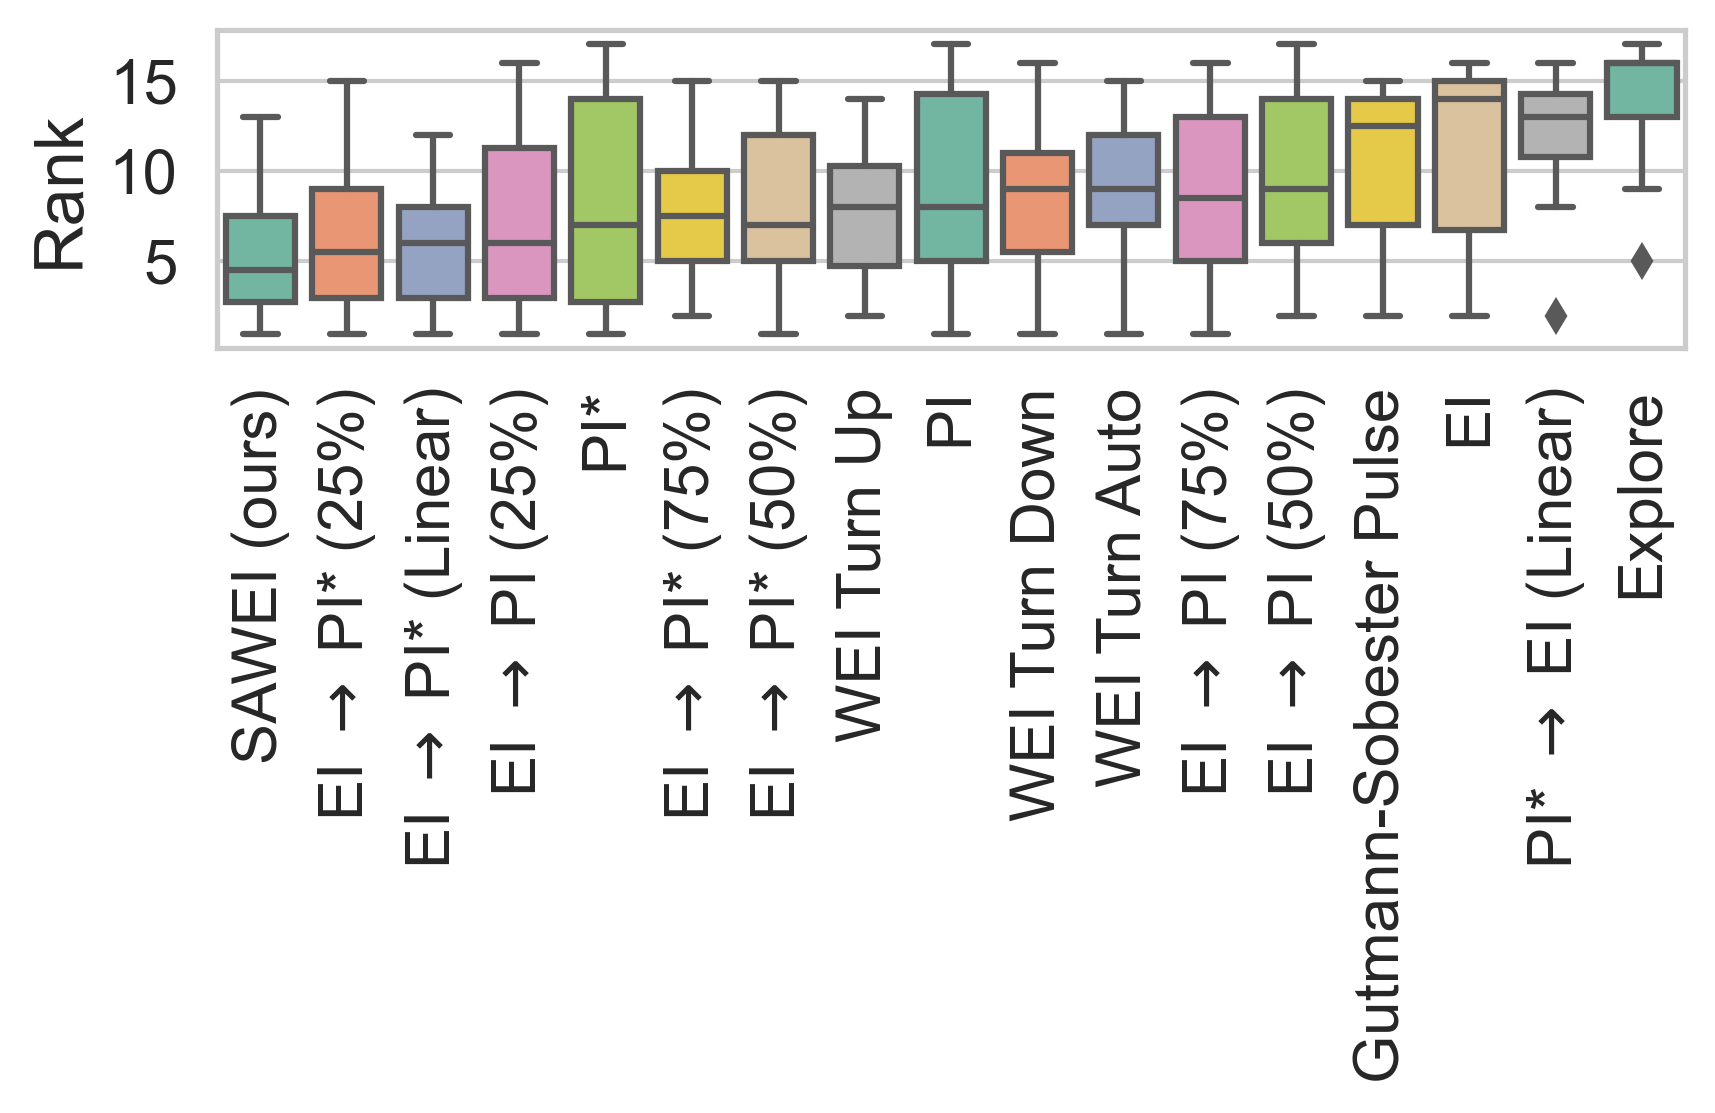

/tmp/ipykernel_25723/3501874067.py:123: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  lat_str = R_final.to_latex(escape=False, float_format="{:0.3f}".format)


\begin{tabular}{lr}
\toprule
{} &     0 \\
policy_name                   &       \\
\midrule
SAWEI (ours)                  & 2.500 \\
EI $\rightarrow$ PI (25%)     & 2.833 \\
EI $\rightarrow$ PI* (Linear) & 2.917 \\
PI                            & 3.917 \\
Gutmann-Sobester Pulse        & 4.583 \\
EI                            & 5.167 \\
Explore                       & 6.833 \\
\bottomrule
\end{tabular}



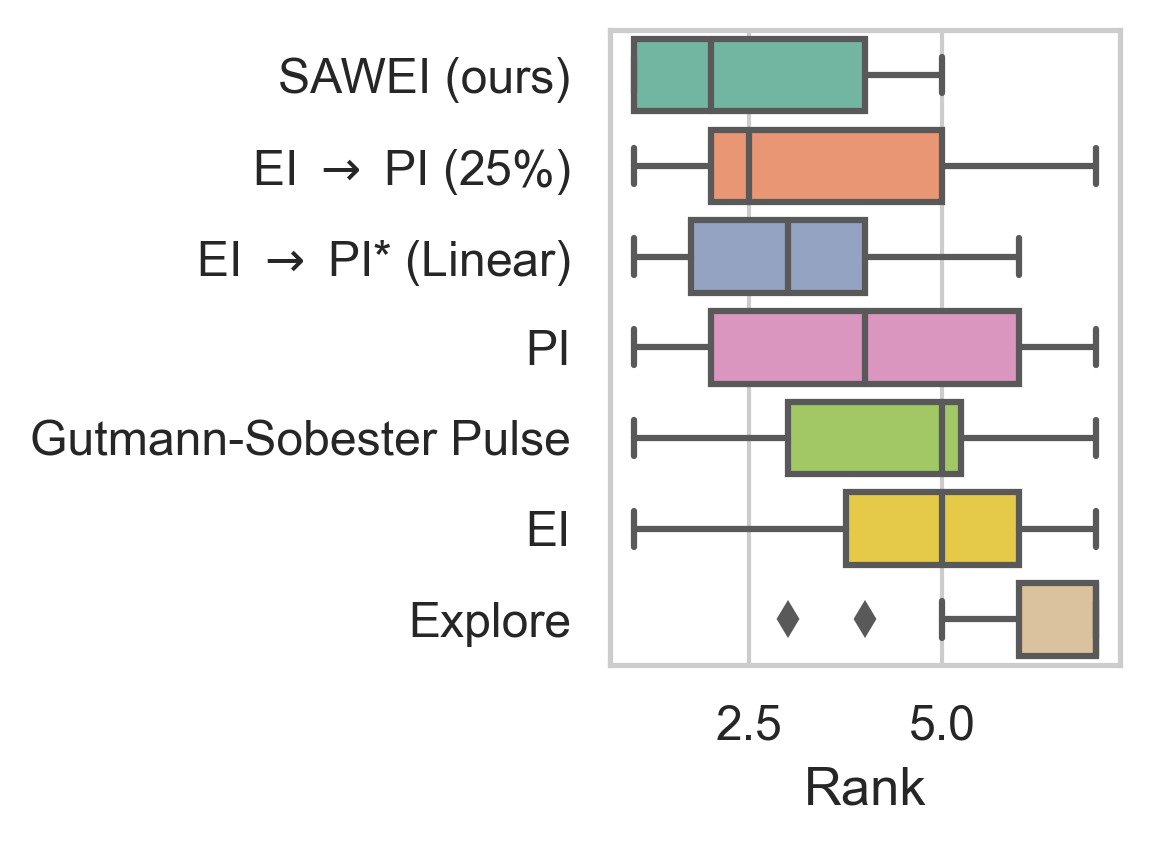

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import trim_mean
from rich import print as printr
from functools import partial

plt.set_loglevel("info") 

sns.set_palette("colorblind")
sns.set(font_scale=1.35)
sns.set_style("whitegrid")

order = None


final_df = rollout_df[rollout_df["step"] == rollout_df["step"].max()]

# Compute ranks
# Compare each run
# groups = final_df.groupby(by=["fid", "seed", "episode"])
# new_df = []
# for gid, gdf in groups:
#     gdf = gdf.sort_values(by="reward", ascending=False)
#     gdf["rank"] = np.arange(1, len(gdf) + 1)
#     new_df.append(gdf)
# df = pd.concat(new_df).reset_index(drop=True)
# df = df.sort_values(by="policy_name")

def calc_iqm(df: pd.DataFrame, key: str = "reward"):
    iqm = trim_mean(df[key], 0.25)
    return iqm

def calc_ranks(gdf: pd.DataFrame):
    D = gdf.groupby(by="policy_name").apply(calc_iqm)
    D = D.sort_values(ascending=False)
    R = np.arange(1, len(D) + 1)
    D = pd.DataFrame({
        "policy_name": D.index,
        "iqm": D.values,
        "rank": R
    })
    D = D.sort_values(by="policy_name")
    return D


def plot_ranks(R: pd.DataFrame, order=None, figsize=(6,4)):
    fig = plt.figure(figsize=figsize, dpi=300)
    ax = fig.add_subplot(111)
    ax = sns.boxplot(data=R, x="policy_name", y="rank", ax=ax, order=order, palette="Set2")
    ax.tick_params(axis='x', labelrotation=90)
    ax.set_ylabel("Rank")
    ax.set_xlabel(None)
    fig.set_tight_layout(True)
    fig.savefig("figures/rank.pdf", dpi=300, bbox_inches="tight")
    plt.show()


def plot_ranks_v(R: pd.DataFrame, order=None, figsize=(6,4)):
    fig = plt.figure(figsize=figsize, dpi=300)
    ax = fig.add_subplot(111)
    ax = sns.boxplot(data=R, x="rank", y="policy_name", ax=ax, order=order, palette="Set2")
    # ax.tick_params(axis='x', labelrotation=90)
    ax.set_xlabel("Rank")
    ax.set_ylabel(None)
    fig.set_tight_layout(True)
    fig.savefig("figures/rank.pdf", dpi=300, bbox_inches="tight")
    plt.show()


def plot_ranks_g(groups, order=None):
    for gid, gdf in groups:
        fig = plt.figure(dpi=300)
        ax = fig.add_subplot(111)
        ax = sns.barplot(data=gdf, x="policy_name", y="rank", ax=ax, order=order)
        ax.tick_params(axis='x', labelrotation=90)
        ax.set_title(gid)
        ax.annotate("*", xy=(gdf["rank"].argmin(), gdf["rank"].min()), fontsize="xx-large")
        fig.set_tight_layout(True)
        plt.show()



R = final_df.groupby(by=["fid", "bbob_instance", "dimension", "episode"]).apply(calc_ranks)
R_final = R.groupby("policy_name").apply(calc_iqm, key="rank")
# R_final = R.groupby("policy_name").apply(lambda x: np.mean(x["rank"]))
R_final = R_final.sort_values()
printr(R_final)

lat_str = R_final.to_latex(escape=False, float_format="{:0.3f}".format)
replacements = {
    "->": "$\\rightarrow$",
    "_": " ",
    "%": "\%",
    "SAWEI ": "SAWEI $\\epsilon=$\\,"
}
for k, v in replacements.items():
    lat_str = lat_str.replace(k, v)
printr(lat_str)

order = R_final.index



plot_ranks(R, order=order)
# R.groupby("fid").pipe(partial(plot_ranks_g, order=order))


# Filtered
policies_to_include = [
    "\\textbf{SAWEI_0.1 (last)}",
    'PI',
    'EI',
    'Explore',
    'EI $\\rightarrow$ PI (25%)',
    'EI $\\rightarrow$ PI* (Linear)',
    'Gutmann-Sobester Pulse',
    'SAWEI (ours)'
]

R = final_df[final_df["policy_name"].isin(policies_to_include)].groupby(by=["fid", "bbob_instance", "dimension", "episode"]).apply(calc_ranks)
R_final = R.groupby("policy_name").apply(calc_iqm, key="rank")
R_final = R_final.sort_values()
lat_str = R_final.to_latex(escape=False, float_format="{:0.3f}".format)
print(lat_str)

sns.set(font_scale=1.05)
sns.set_style("whitegrid")
order = R_final.index
plot_ranks_v(R, order=order, figsize=(4,3))





# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax = sns.kdeplot(data=R, x="rank", hue="policy_name", ax=ax, cut=0)
# fig.set_tight_layout(True)
# plt.show()


# grid = sns.FacetGrid(data=R, row="policy_name")
# grid.map_dataframe(sns.histplot, x="rank")
# plt.show()




## Final Reward Boxplot Grid 

/tmp/ipykernel_25723/3364448708.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df.loc[:, "policy_name"] = plot_df["policy_name"].str.replace("\\textbf{SAWEI_0.1 (last)}", "SAWEI (ours)", regex=False)


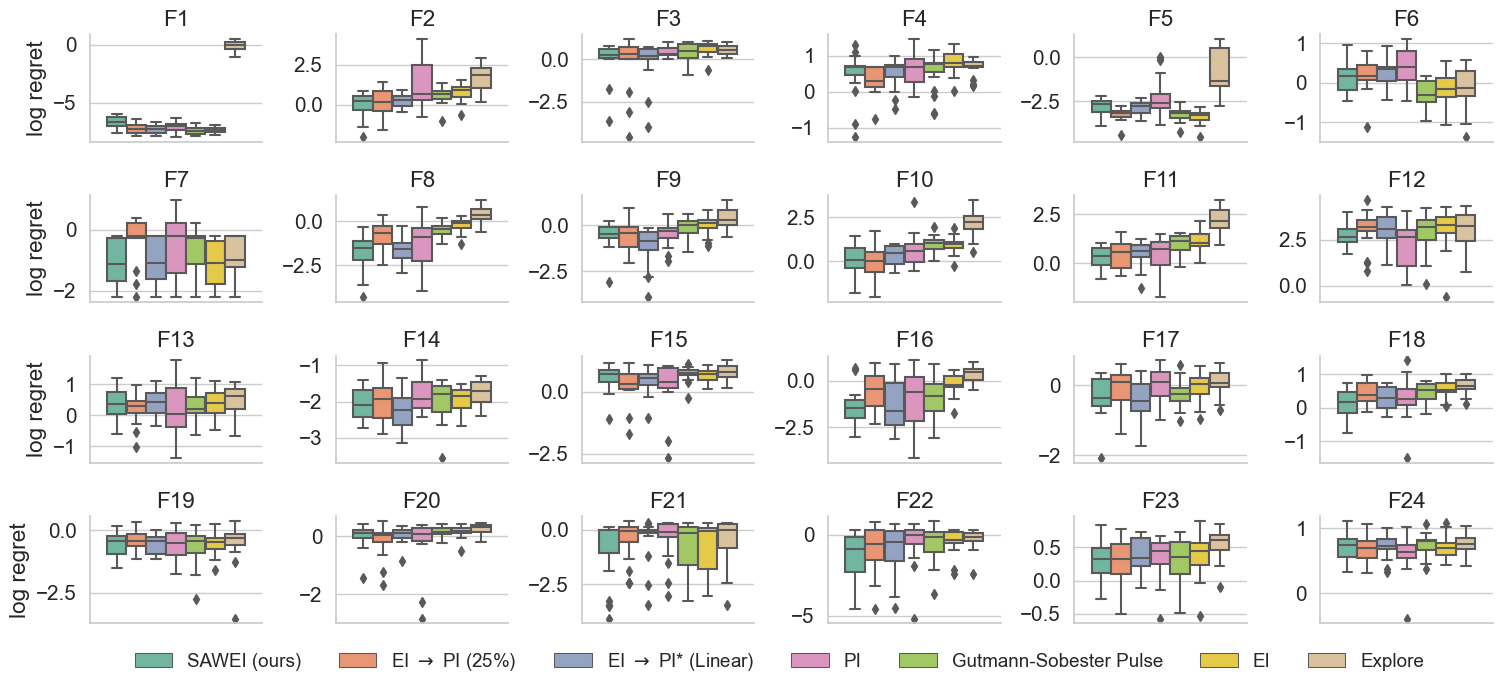

In [37]:
policies_to_include = [
    #"\\textbf{SAWEI_0.1 (last)}",
    'PI',
    'EI',
    'Explore',
    'EI $\\rightarrow$ PI (25%)',
    'EI $\\rightarrow$ PI* (Linear)',
    'Gutmann-Sobester Pulse',
    'SAWEI (ours)'
]

final_df = rollout_df[rollout_df["step"] == rollout_df["step"].max()]
plot_df = final_df[final_df["policy_name"].isin(policies_to_include)]
plot_df.loc[:, "policy_name"] = plot_df["policy_name"].str.replace("\\textbf{SAWEI_0.1 (last)}", "SAWEI (ours)", regex=False)
plot_df = plot_df.sort_values(by="policy_name")


grid = sns.FacetGrid(data=plot_df, col="fid", sharex=True, sharey=False, col_wrap=6, legend_out=True, height=1.8, aspect=1.5)
grid.map_dataframe(sns.boxplot, x="step", y="log regret", hue="policy_name", dodge=True, palette="Set2", hue_order=list(order))  # order is defined by final rank cell
grid.set_titles(col_template="F{col_name}") 
grid.set_xlabels(None)
grid.set_xticklabels(None)
grid.set_xlabels(None)
for ax in grid.axes:
    ax.set_xlabel(None)
grid.add_legend(title=None, loc='upper center', bbox_to_anchor=(0.3, 0.1), fancybox=True, shadow=False, ncol=7, fontsize="small")
grid.savefig(f"figures/log_regret/all_.pdf", dpi=300, bbox_inches="tight")

# for i in range(1, 25, 2):
#     fids = [i, i+1]
#     grid = sns.FacetGrid(data=plot_df[plot_df["fid"].isin(fids)], col="fid", sharex=True, sharey=False, col_wrap=None, legend_out=True)
#     grid.map_dataframe(sns.boxplot, x="step", y="log regret", hue="policy_name", dodge=True, palette="Set2")
#     grid.set_titles(col_template="F{col_name}") 
#     grid.set_xlabels(None)
#     grid.add_legend(title=None) #, loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=False, ncol=5, fontsize="x-small")
#     grid.savefig(f"figures/log_regret/{i:03d}.png", dpi=300, bbox_inches="tight")
    

## Final Reward (Boxplot) (All)

In [ ]:
from pathlib import Path
from functools import partial
from multiprocessing import Pool
from IPython.display import Image, display
import matplotlib.pyplot as plt
import seaborn as sns
from awei.adaptive_weighted_ei import detect_switch

plt.set_loglevel("info") 

sns.set_palette("colorblind")
sns.set(font_scale=0.8)
sns.set_style("whitegrid")

df = rollout_df


def plot_boxplot(group, dpi: int = 100, outdir: str = "figures", identifier: str = ""):
    # Reward, UBR, UBR gradient per function and policy
    gid, gdf = group
    gdf = gdf.copy()
    gdf = gdf[gdf["step"] == gdf["step"].max()]

    hue = "policy_name"
    x = "step"
    y = ["reward"]
    ncols = len(y)

    figsize = (10, 4)
    fig = plt.figure(figsize=figsize, dpi=dpi)
    axes = fig.subplots(nrows=1, ncols=ncols, sharex=True, sharey=False)

    for j, _y in enumerate(y):
        try:
            ax = axes[j]
            ax = sns.boxplot(data=gdf, x=x, y=_y, hue=hue, ax=ax)
            ax.set_title(_y)
            if j == len(y) - 1:
                if hue:
                    ax.legend()
            else:
                ax.get_legend().remove()
        except:
            pass

    fig.suptitle(gid)
    fig.set_tight_layout(True)

    if type(gid) == int:
        gid_id = f"{gid:03d}"
    else:
        gid_id = str(gid)

    fn = Path(outdir) / (identifier + gid_id + ".png")
    fn.parent.mkdir(exist_ok=True, parents=True)
    fig.savefig(fn)

    return fn


sns.boxplot(data=df[df["step"] == df["step"].max()], x="reward", hue="policy_name")  # , cut=0)
# groups = [("all", df)]
# kwargs = dict(identifier="compare_baselines_boxplot_all_")
# with Pool() as pool:
#     fns = pool.map(partial(plot_boxplot, **kwargs), groups)
# fns.sort()
# for fn in fns:
#     display(Image(filename=fn))

## Final Reward (Boxplot) (Per Function)

In [ ]:
from pathlib import Path
from functools import partial
from multiprocessing import Pool
from IPython.display import Image, display
import matplotlib.pyplot as plt
import seaborn as sns
from awei.adaptive_weighted_ei import detect_switch
from scipy.stats import linregress, trim_mean

plt.set_loglevel("info") 

sns.set_palette("colorblind")
sns.set(font_scale=0.8)
sns.set_style("whitegrid")

df = rollout_df


def plot_boxplot(group, dpi: int = 100, outdir: str = "figures", identifier: str = ""):
    # Reward, UBR, UBR gradient per function and policy
    gid, gdf = group
    gdf = gdf.copy()
    gdf = gdf[gdf["step"] == gdf["step"].max()]
    # gdf = gdf[gdf["seed"] == 4]

    hue = "policy_name"

    x = "step"
    y = ["reward", "ubr", "ubr_gradient", "ubr-opt"]

    y = ["log regret"]


    # gdf["mi7gswitch"] = detect_switch(gdf["ubr"].to_numpy(), 7)

    # y = ["ubr", "mi7gswitch"] #, "U_iqr_grad", "switch", "linefit", "slope"]
    # hue = "seed"
    # hue = None

    ncols = len(y)  # + 1

    figsize = (10, 4)
    fig = plt.figure(figsize=figsize, dpi=dpi)
    axes = fig.subplots(nrows=1, ncols=ncols, sharex=False, sharey=False)

    for j, _y in enumerate(y):
        try:
            ax = axes[j]
            ax = sns.boxplot(data=gdf, x=x, y=_y, hue=hue, ax=ax)
            ax.set_title(_y)
            if j == len(y) - 1:
                if hue:
                    ax.legend()
            else:
                ax.get_legend().remove()
        except:
            pass

    # G = gdf.groupby(by="policy_name")
    # iqm = {}
    # for _gid, gdf in G:
    #     iqm[_gid] = trim_mean(gdf["reward"], proportiontocut=0.25)
    # iqm = pd.Series(iqm)
    # axes[-1] = sns.barplot(x=iqm.index, y=iqm.values, ax=axes[-1])
    # axes[-1].annotate("*", xy=(iqm.argmax(), iqm.max()), fontsize="xx-large")

    fig.suptitle(gid)
    fig.set_tight_layout(True)

    if type(gid) == int:
        gid_id = f"{gid:03d}"
    else:
        gid_id = str(gid)

    fn = Path(outdir) / (identifier + gid_id + ".png")
    fn.parent.mkdir(exist_ok=True, parents=True)
    fig.savefig(fn)

    return fn


group_keys = "fid"
groups = list(df.groupby(by=group_keys))
kwargs = dict(identifier="compare_baselines_boxplot_")
with Pool() as pool:
    fns = pool.map(partial(plot_boxplot, **kwargs), groups)
fns.sort()
for fn in fns:
    display(Image(filename=fn))


#plot_reward_ubr_gradient(group=groups[3])


## Attitude Inspection

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("colorblind")
sns.set(font_scale=0.8)
sns.set_style("whitegrid")

def plot_attitude(group, dpi: int = 100, outdir: str = "figures", identifier: str = ""):
    # Reward, UBR, UBR gradient per function and policy
    gid, gdf = group
    gdf = gdf.copy()

    hue = "policy_name"

    gdf["exploiting"] = gdf["pi_term"] > gdf["ei_term"]

    gdf["pi_term-ei_term"] = gdf["pi_term"] - gdf["ei_term"]

    x = "step"
    y = ["alpha", "pi_term-ei_term", "exploiting"]
    ncols = len(y) + 1

    figsize = (10, 4)
    fig = plt.figure(figsize=figsize, dpi=dpi)
    axes = fig.subplots(nrows=1, ncols=ncols, sharex=False, sharey=False)

    for j, _y in enumerate(y):
        try:
            ax = axes[j]
            ax = sns.lineplot(data=gdf, x=x, y=_y, hue=hue, ax=ax)
            ax.set_title(_y)
            if j == len(y) - 1:
                if hue:
                    ax.legend()
            else:
                ax.get_legend().remove()
        except:
            pass

    axes[-1] = sns.boxplot(data=gdf[gdf["step"] == gdf["step"].max()], x="step", y="reward", hue="policy_name")
    axes[-1].get_legend().remove()

    fig.suptitle(gid)
    fig.set_tight_layout(True)

    if type(gid) == int:
        gid_id = f"{gid:03d}"
    else:
        gid_id = str(gid)

    fn = Path(outdir) / (identifier + gid_id + ".png")
    fn.parent.mkdir(exist_ok=True, parents=True)
    fig.savefig(fn)

    return fn

# df = rollout_df[rollout_df["policy_name"].str.startswith("SAWEI")]
df = rollout_df
fns = dispatch_plots(df, plot_attitude, group_keys="fid", identifier="inspect_alpha_attitude_")


## Misc

In [ ]:
from scipy.stats import linregress, trim_mean
import seaborn as sns

df = rollout_df
groups = list(df.groupby(by="fid"))
G = groups[0][1].groupby(by="policy_name")
iqm = {}
for gid, gdf in G:
    iqm[gid] = trim_mean(gdf["reward"], proportiontocut=0.25)
iqm = pd.Series(iqm)

print(iqm.argmax())

ax = sns.barplot(x=iqm.index, y=iqm.values)
ax.annotate("*", xy=(0.85*iqm.argmax(), 0.975*iqm.max()), fontsize="xx-large")
# ax.tick_params(axis='x', labelrotation=45,)
# groups[0][1].groupby(by="policy_name")["reward"].apply(trim_mean, proportiontocut=0.25)

In [ ]:
# UBR per Function and Policy
# grid = sns.FacetGrid(data=rollout_df, row="fid", hue="policy_name", sharey=False, legend_out=True)
# grid.map_dataframe(sns.lineplot, x="step", y="ubr")
# grid.add_legend()
# plt.show()

# sns.lineplot(data=rollout_df, x="step", y="ubr", hue=None)
# plt.show()
# sns.lineplot(data=rollout_df, x="step", y="reward", hue=None)
# plt.show()

# Reward distribution per function and policy
# grid = sns.FacetGrid(data=rollout_df[rollout_df["step"] == rollout_df["step"].max()], row="fid", hue="policy_name", sharey=False, sharex=False)
# grid.map_dataframe(sns.kdeplot, x="reward", cut=0, fill=True, alpha=0.3)
# grid.add_legend()
# plt.show()

# Reward per Function and Policy
# grid = sns.FacetGrid(data=rollout_df, row="fid", hue="policy_name", sharey=False)
# grid.map_dataframe(sns.lineplot, x="step", y="reward")
# grid.add_legend()
# plt.show()#
f"{32:05d}"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
fn = "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs_debug/wei_history.json"
df = pd.read_json(fn, orient="split")
df["explore"] = df["pi_term"] < df["ei_term"]
df["acq"] = df["alpha"] * df["pi_term"] + (1 - df["alpha"]) * df["ei_term"]

plt.plot(df["pi_term"], label="pi_term")
plt.plot(df["ei_term"], label="ei_term")
plt.plot(df["acq"], label="acq")
plt.legend()
plt.show()

sns.lineplot(df["explore"], marker="o")

In [ ]:
import ioh
from rich import inspect
problem = ioh.get_problem(
    fid=1,
    instance=1,
    dimension=2,
    problem_type="BBOB",
)

inspect(problem)

In [ ]:
# Old Switch / Smoothing Thoughts (in plot)

from scipy.ndimage import uniform_filter1d
from scipy.signal import correlate, butter, sosfilt
from scipy.stats import iqr
from numpy.lib.stride_tricks import sliding_window_view
from scipy.stats import linregress, trim_mean


def get_iqr_norm(X: np.ndarray) -> float:
    # U_norm = (X - X.min()) / np.ptp(X)
    U_norm = X
    U_iqr = iqr(U_norm)
    U_ptp = np.ptp(U_norm) + 1e-8
    ratio = U_iqr / U_ptp
    return U_iqr
    
##### Tmp
# gdf = gdf[gdf["policy_name"] == "EI"]
gdf["avg3"] = uniform_filter1d(gdf["ubr-opt"], size=3)
gdf["avg5"] = uniform_filter1d(gdf["ubr-opt"], size=5)
gdf["corr"] = correlate(gdf["ubr-opt"], gdf["ubr-opt"], mode="same")
gdf["corr_linear"] = correlate(gdf["ubr-opt"], np.ones(shape=len(gdf))*1, mode="same")
U = gdf["ubr"].to_numpy()
window_size = 10
view = sliding_window_view(U, window_size)
first_U_iqr = [get_iqr_norm(U[:i+1]) for i in range(window_size - 1)]
windowed_iqr = [get_iqr_norm(view[i]) for i in range(view.shape[0])]
U_iqr = np.concatenate((first_U_iqr, windowed_iqr))
gdf["U_iqr"] = U_iqr
U_iqr_grad = np.gradient(U_iqr)
gdf["U_iqr_grad"] =U_iqr_grad
max_grad = np.array([np.max(U_iqr_grad[:i+1]) for i in range(len(U_iqr_grad))])
gdf["switch"] = [np.isclose(U_iqr_grad[i], 0, atol=0.01*max_grad[i]) for i in range(len(U_iqr_grad))]


# Fit a line to each window, plot regression coeff
U_padded = np.concatenate((np.array([U[0]] * (window_size - 1)), U))
slices = [U_padded[i:i + window_size] for i in range(U_padded.shape[0] - window_size + 1)]
results = [linregress(np.arange(0, window_size), slices[i]) for i in range(len(slices))]
rvalues = [r.rvalue for r in results]
R_squared = [r**2 for r in rvalues]
gdf["linefit"] = R_squared
gdf["slope"] = [r.slope for r in results]

# Filter with lowpass butter filter
butter_filter = butter(2, 0.9999, output="sos")
gdf["filtered"] = sosfilt(butter_filter, U)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
fn = "/home/benjamin/Dokumente/code/tmp/DAC-BO/AWEI/awei_runs_debug/rollout_data.json"
df = pd.read_json(fn, orient="split")
sns.lineplot(df, x="step", y="action", hue="policy_name")
plt.show()